**Линия водораздела** -  точки, находящиеся
на гребне, т. е. с которых вода с равной вероятностью скатывается более чем в один такой минимум.

**Бассейн** -  точки, находящиеся на склоне, т. е. с которых вода
скатывается в один и тот же локальный минимум
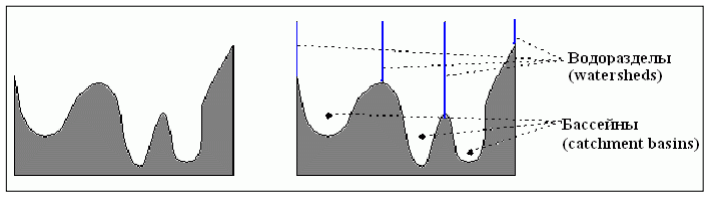

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
image = cv2.imread('/content/sample_data/watershed_test.png', cv2.IMREAD_GRAYSCALE)

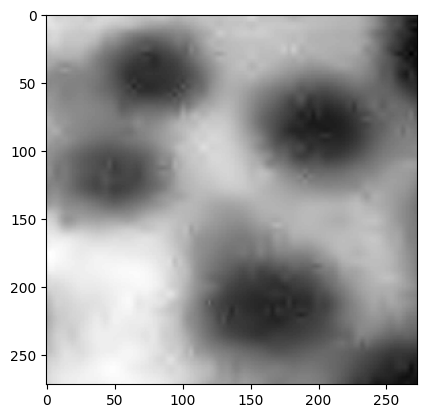

In [ ]:
plt.imshow(image, 'gray')

In [ ]:
_, threshold = cv2.threshold(image,70,255,cv2.THRESH_BINARY_INV)

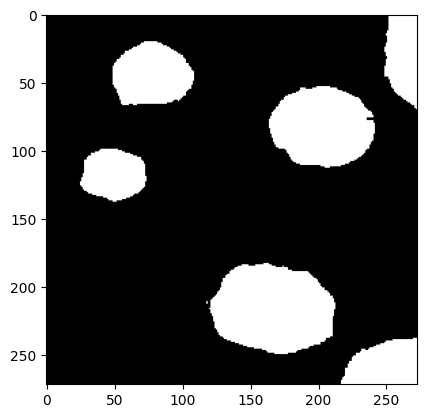

In [ ]:
plt.imshow(threshold, 'gray')

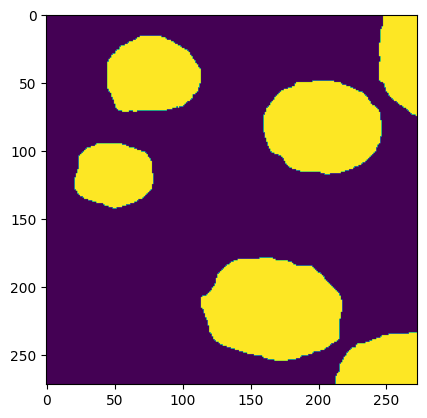

In [ ]:
# Morphological processing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
dilate = cv2.dilate(threshold, kernel, iterations=1)

plt.imshow(dilate)

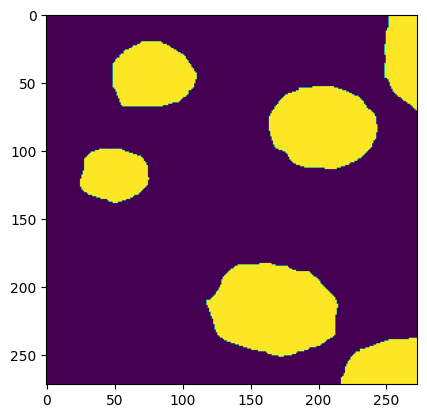

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
erode1 = cv2.erode(dilate, kernel)

plt.imshow(erode1)

In [ ]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
# erode2 = cv2.erode(dilate, kernel)

# plt.imshow(erode2)

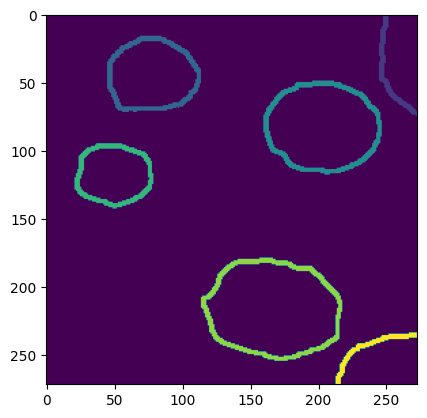

In [ ]:
ring_marker = cv2.subtract(dilate, erode1)
#ring_marker = cv2.bitwise_or(ring_marker, erode2)

# Marker labelling
ret, markers = cv2.connectedComponents(ring_marker)

plt.imshow(markers)

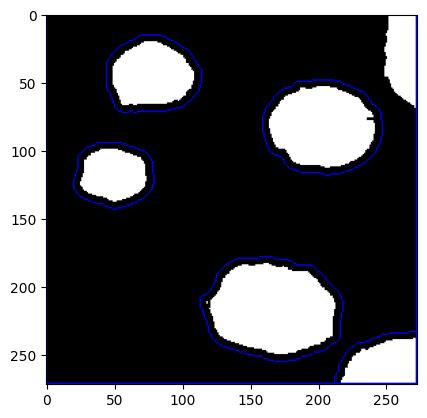

In [ ]:
# Convert to rgb
img = cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR)

# Apply watershed
markers = cv2.watershed(cv2.cvtColor(dilate, cv2.COLOR_GRAY2RGB), markers)
img[markers == -1] = [0,0,255]

plt.imshow(img)

In [ ]:
# Example 1
image = cv2.imread('/content/sample_data/watershed_1.jpg', cv2.IMREAD_GRAYSCALE)

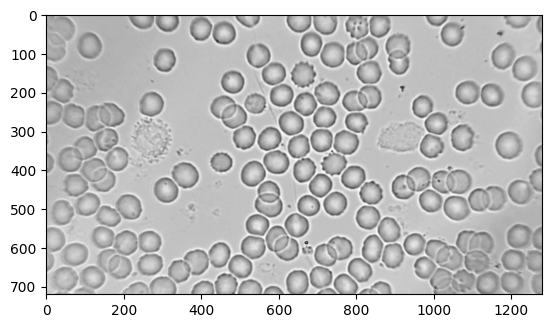

In [ ]:
plt.imshow(image, 'gray')

In [ ]:
_, threshold = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)

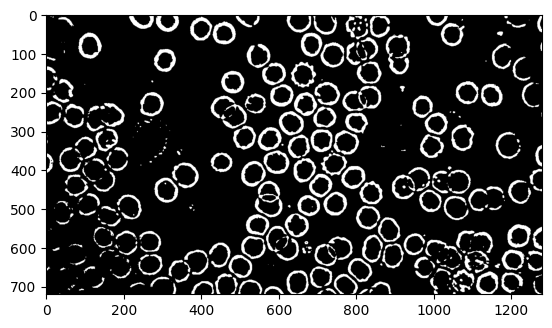

In [ ]:
plt.imshow(threshold, 'gray')

In [ ]:
# Morphological processing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
dilate = cv2.dilate(threshold, kernel, iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
erode1 = cv2.erode(dilate, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
erode2 = cv2.erode(dilate, kernel)

ring_marker = cv2.subtract(erode1, erode2)

# Marker labelling
ret, markers = cv2.connectedComponents(ring_marker)

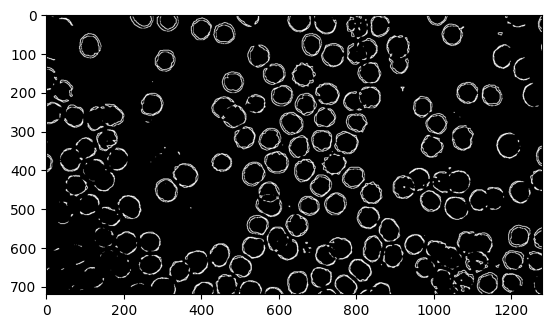

In [ ]:
plt.imshow(ring_marker, 'gray')

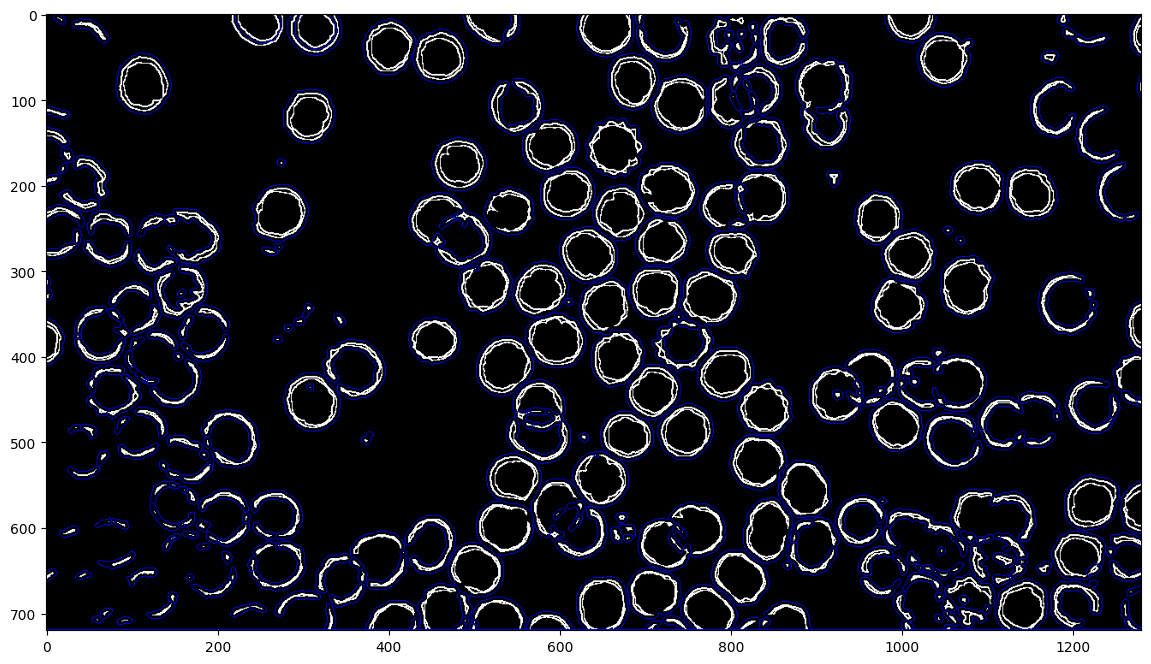

In [ ]:
# Convert to rgb
img = cv2.cvtColor(ring_marker, cv2.COLOR_GRAY2BGR)

# Apply watershed
markers = cv2.watershed(cv2.cvtColor(dilate, cv2.COLOR_GRAY2RGB), markers)
img[markers == -1] = [0,0,255]

plt.figure(figsize=(16,8))
plt.imshow(img)

In [ ]:
image = cv2.imread('/content/sample_data/watershed_2.jpg', cv2.IMREAD_GRAYSCALE)

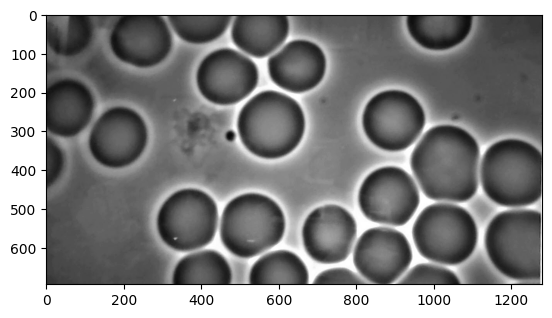

In [ ]:
plt.imshow(image, 'gray')

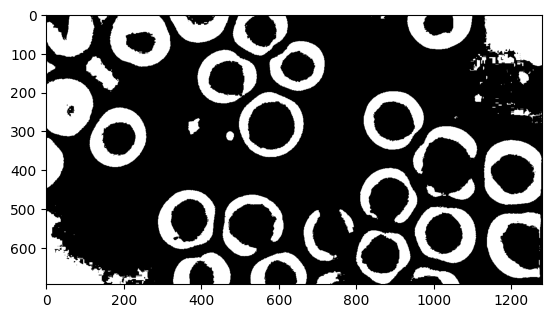

In [ ]:
_, threshold = cv2.threshold(image,100,255,cv2.THRESH_BINARY_INV)

plt.imshow(threshold, 'gray')

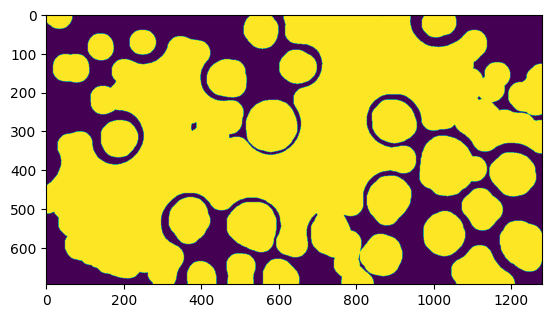

In [ ]:
# Morphological processing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
close = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
threshold = cv2.bitwise_not(close)
threshold =  cv2.dilate(threshold, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)), iterations=1)

plt.imshow(threshold)

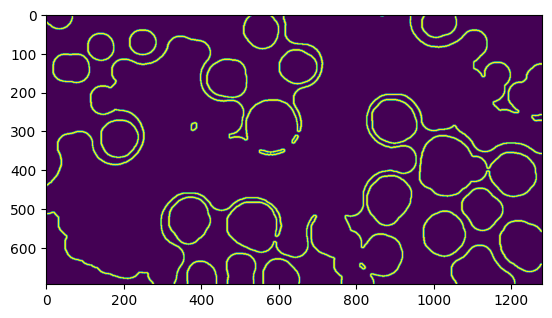

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dilate = cv2.dilate(threshold, kernel, iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
erode1 = cv2.erode(dilate, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))
erode2 = cv2.erode(dilate, kernel)

ring_marker = cv2.subtract(erode1, erode2)

plt.imshow(ring_marker)


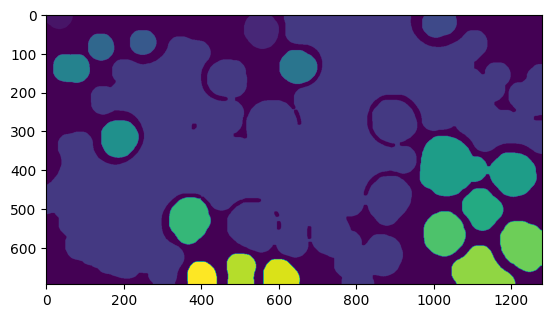

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(close)

plt.imshow(markers)

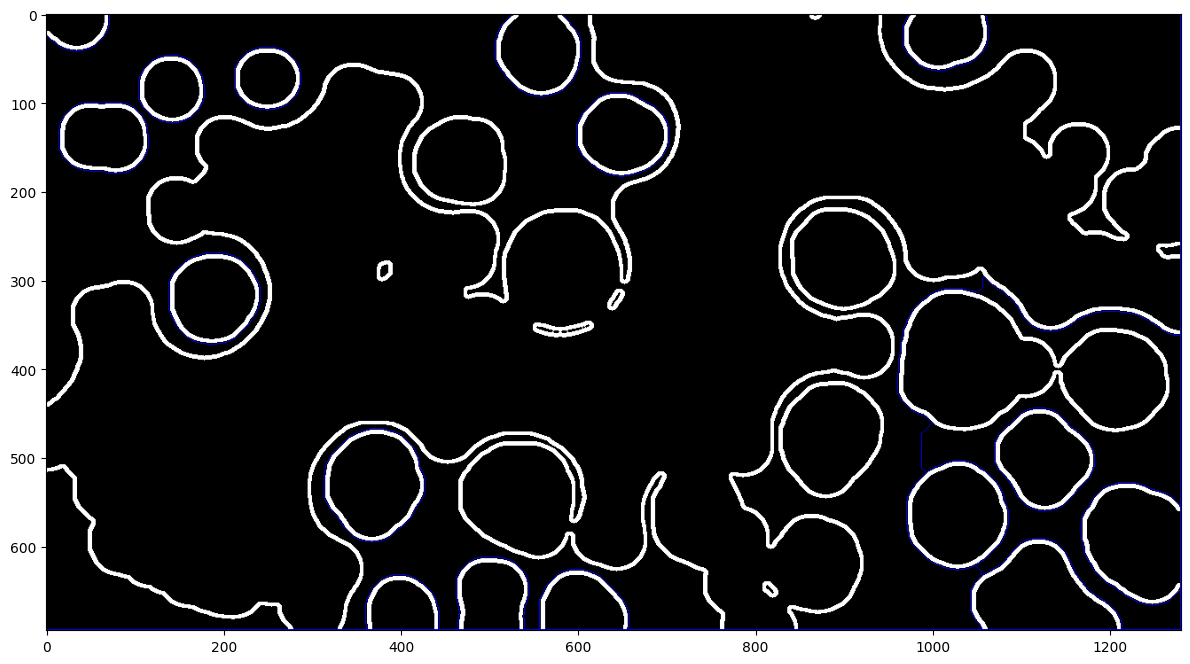

In [ ]:
# Convert to rgb
img = cv2.cvtColor(ring_marker, cv2.COLOR_GRAY2BGR)

# Apply watershed
markers = cv2.watershed(cv2.cvtColor(dilate, cv2.COLOR_GRAY2RGB), markers)
img[markers == -1] = [0,0,255]

plt.figure(figsize=(16,8))
plt.imshow(img)